In [1]:
import turicreate as tc
import matplotlib.pyplot as mpl
import random as rd
%matplotlib inline

# Primeiro, algumas manipulações no database para caber melhor no modelo.

In [2]:
iris = tc.SFrame.read_csv("Iris.csv")
def func1(x): 
    if x['Species']!='' : 
        return x['Species'] 
    else : 
        return None 
iris['Species'] = iris.apply(func1) 
iris = iris.dropna(how ='any')

Finished parsing file /home/davi/Documentos/Machine Learning/Projeto AVLC/GITProjeto/MachineLearningProject/notebooks/Iris.csv

Parsing completed. Parsed 100 lines in 0.017057 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/davi/Documentos/Machine Learning/Projeto AVLC/GITProjeto/MachineLearningProject/notebooks/Iris.csv

Parsing completed. Parsed 150 lines in 0.01252 secs.

In [3]:
cor = {'Iris-setosa' : 'purple','Iris-virginica':'red'}

# Nosso database é dividido em duas classes:
# 1) Iris - setosa, representado em roxo no gráfico.
# 2) Iris-virginica, representado em vermelho no gráfico.

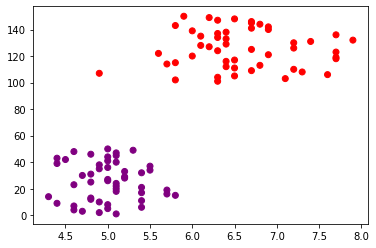

In [4]:
mpl.scatter(iris['SepalLengthCm'],iris['Id'],c = iris['Species'].apply(lambda x: cor[x]))

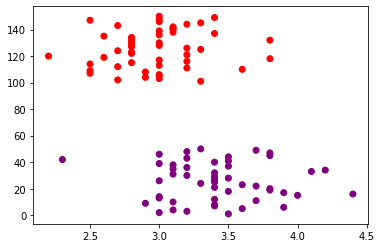

In [5]:
mpl.scatter(iris['SepalWidthCm'],iris['Id'],c = iris['Species'].apply(lambda x: cor[x]))

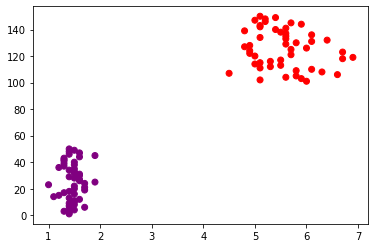

In [6]:
mpl.scatter(iris['PetalLengthCm'],iris['Id'],c = iris['Species'].apply(lambda x: cor[x]))

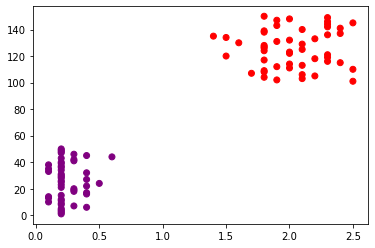

In [7]:
mpl.scatter(iris['PetalWidthCm'],iris['Id'],c = iris['Species'].apply(lambda x: cor[x]))

   # Com os gráficos acima, podemos perceber que todas as características do nosso banco de dados apontam que existe uma separação trivial e linear entre elementos de uma classe e de outra.
* Portanto, vamos utilizar o SVM para criar um modelo eficiente de classificação linear.

 *Aqui utilizo de uma versão extendida do banco de dados original, para efeitos de melhor demonstração.*

In [8]:
irisExtendido = tc.SFrame.read_csv('IrisExtendido.csv')
irisExtendido = irisExtendido.dropna()
irisExtendido
dataTreino, dataTeste = irisExtendido.random_split(0.8,seed = 666)

modelo = tc.svm_classifier.create(dataTreino,target = 'Species', features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

Finished parsing file /home/davi/Documentos/Machine Learning/Projeto AVLC/GITProjeto/MachineLearningProject/notebooks/IrisExtendido.csv

Parsing completed. Parsed 100 lines in 0.157157 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/davi/Documentos/Machine Learning/Projeto AVLC/GITProjeto/MachineLearningProject/notebooks/IrisExtendido.csv

Parsing completed. Parsed 1048575 lines in 0.240582 secs.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



SVM:

--------------------------------------------------------

Number of examples          : 38907

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients    : 5

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.036224     | 0.500398          | 0.500977            |

| 1         | 5        | 5.000000  | 1.060539     | 0.998946          | 0.997559            |

| 2         | 6        | 5.000000  | 1.071891     | 0.998638          | 0.997070            |

| 3         | 9        | 0.891450  | 1.089340     | 0.998921          | 0.997559            |

| 4         | 13       | 0.222862  | 1.111136     | 0.999178          | 0.998047            |

| 9         | 26       | 0.713655  | 1.192956     | 1.000000          | 1.000000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Aqui vemos que, apesar de ser um modelo mais aplicável somente a dados de classificação binária e separavél, o SVM tem um sucesso tremendo em classificar os dados com eficiência. Perceba no campo 'accuracy' que a precisão foi de 100%, ou seja, nosso modelo previu, com 100% de acerto, todas as classes dos dados de teste.

In [9]:
modelo.evaluate(dataTeste)

{'accuracy': 1.0,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 2
 
 Data:
 +----------------+-----------------+-------+
 |  target_label  | predicted_label | count |
 +----------------+-----------------+-------+
 | Iris-virginica |  Iris-virginica |  5158 |
 |  Iris-setosa   |   Iris-setosa   |  5087 |
 +----------------+-----------------+-------+
 [2 rows x 3 columns],
 'f1_score': 1.0,
 'precision': 1.0,
 'recall': 1.0}

# Abaixo temos os coeficientes lineares usados para traçar o hiperplano por cada uma das features recebidas pelo nosso modelo.

In [12]:
modelo.coefficients

name,index,class,value
(intercept),None,Iris-virginica,-1.6746569697293265
SepalLengthCm,None,Iris-virginica,-0.14968446538608546
SepalWidthCm,None,Iris-virginica,-0.0017306683836945907
PetalLengthCm,None,Iris-virginica,0.33206328659292794
PetalWidthCm,None,Iris-virginica,1.3359969456535479
